In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_33448\3613698164.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_RO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_sea.csv')
data_RO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_nacl.csv')
data_RO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_simple.csv')
data_RO_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_reaktoro.csv')

In [3]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple.csv')

In [4]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Membrane Area" , "Operating Pressure"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_seawater[i]) / data_RO_reaktoro[i]) * 100
    error_nacl[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_nacl[i]) / data_RO_reaktoro[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_simple[i]) / data_RO_reaktoro[i]) * 100

In [5]:
# Sea errors
for i in results_col:
    print(i)
    print(np.mean(error_sea[i]))

LCOW
0.1531131530862072
SEC
0.1505158359747973
Membrane Area
0.20623117016567952
Operating Pressure
0.04231872969103587


In [6]:
# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl[i]))

LCOW
6.122166731498077
SEC
7.143923302950521
Membrane Area
0.12940483715037493
Operating Pressure
7.01014535346698


In [7]:
sea_color = "#FFD046"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

In [8]:
title_size = 14
plt.rcParams.update({'font.size': 14})

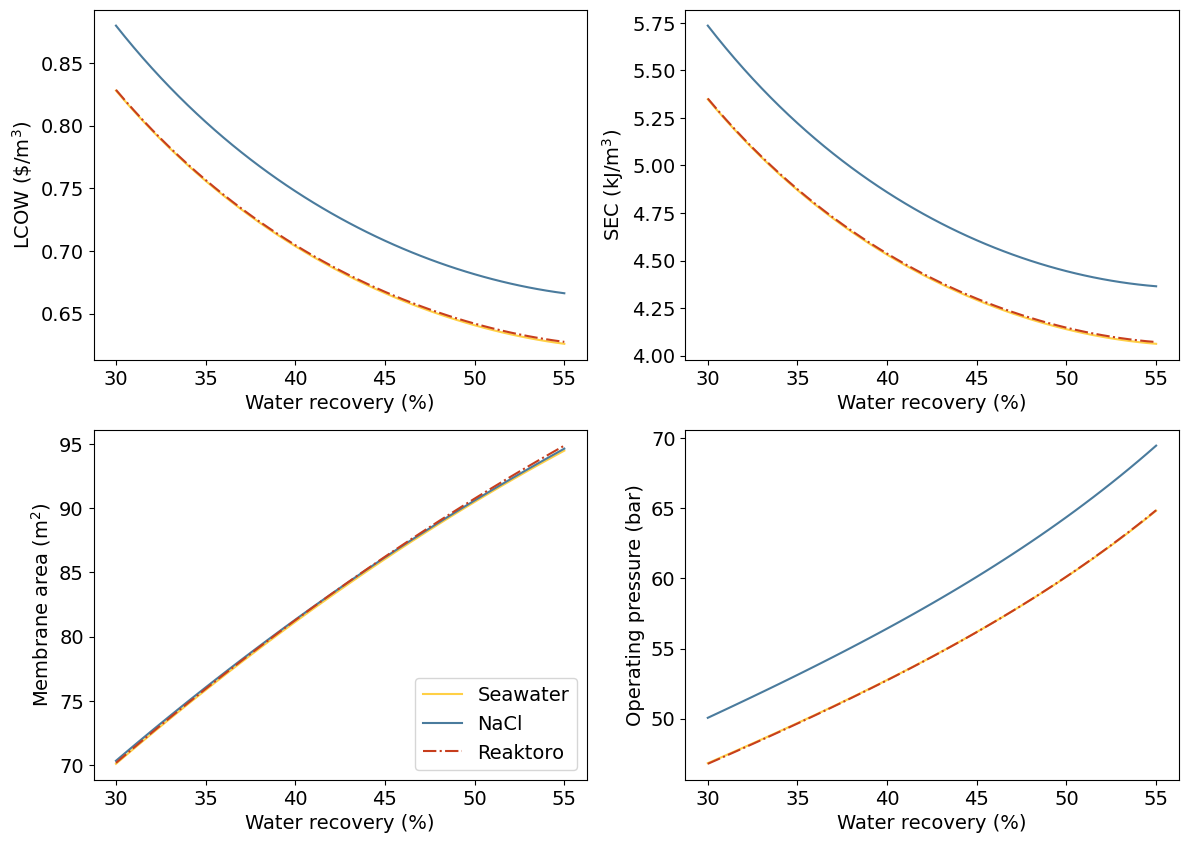

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
# axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
axs[0,0].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['LCOW'], "-.", color=reaktoro_color)
axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
# axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
axs[0,1].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['SEC'], "-.", color=reaktoro_color)
axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'], color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
# axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)
axs[1,0].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['Membrane Area'], "-.", color=reaktoro_color)
axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Membrane area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
# axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
axs[1,1].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['Operating Pressure']/1e5, "-.", color=reaktoro_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Operating pressure (bar)", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Reaktoro"], loc="lower right", fontsize=title_size)

fig.savefig("RO_comparison")


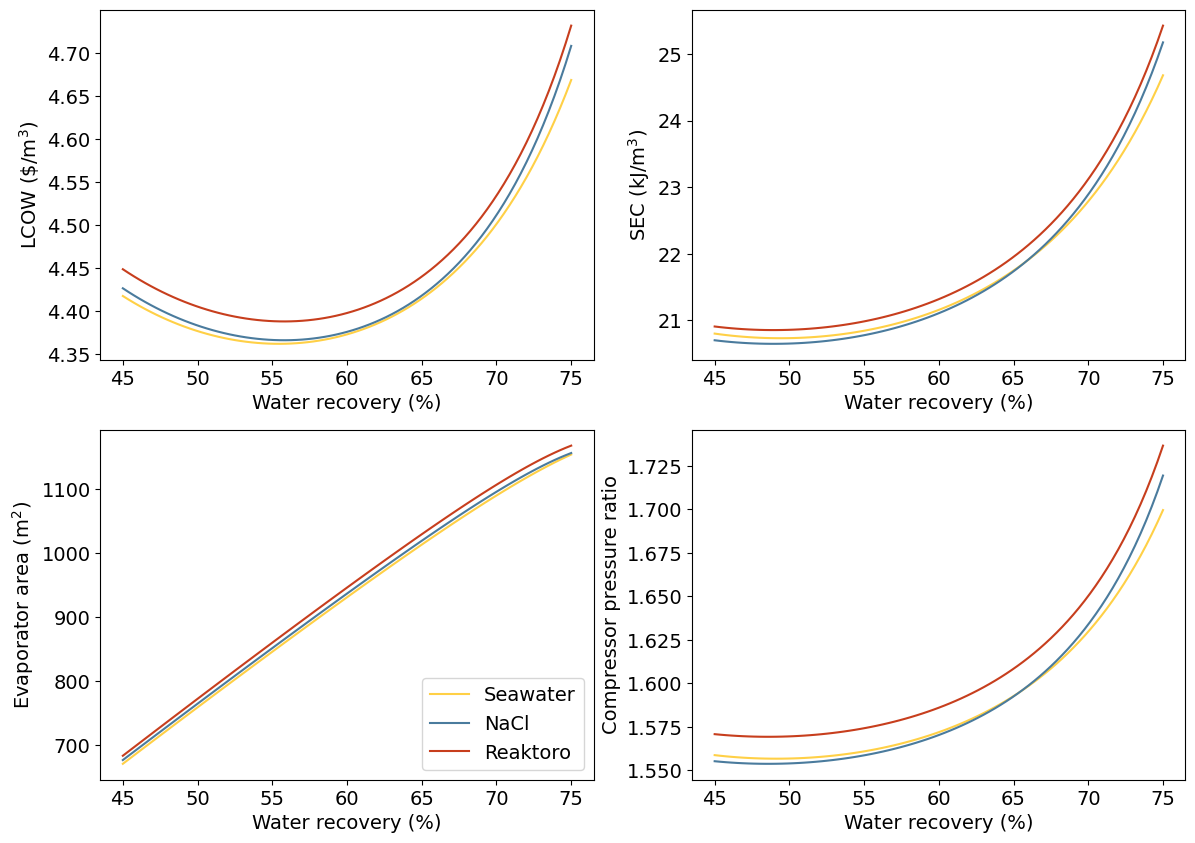

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))

data_MVC_seawater_low = data_MVC_seawater[(data_MVC_seawater["Inlet Salinity"] == 3.500000e-02) ]
data_MVC_nacl_low = data_MVC_nacl[(data_MVC_nacl["Inlet Salinity"] == 3.500000e-02) ]
data_MVC_simple_low = data_MVC_simple[(data_MVC_simple["Inlet Salinity"] == 3.500000e-02) ]

data_MVC_seawater_hi = data_MVC_seawater[(data_MVC_seawater["Inlet Salinity"] == 7.000000e-02) ]
data_MVC_nacl_hi = data_MVC_nacl[(data_MVC_nacl["Inlet Salinity"] == 7.000000e-02) ] 
data_MVC_simple_hi = data_MVC_simple[(data_MVC_simple["Inlet Salinity"] == 7.000000e-02) ] 

# axs[0,0].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['LCOW'])
# axs[0,0].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['LCOW'])
# axs[0,0].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['LCOW'])
axs[0,0].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['LCOW'], color=nacl_color)
axs[0,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['LCOW']*1.005, color=reaktoro_color)
# axs[0,0].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

# axs[0,1].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['SEC'])
# axs[0,1].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['SEC'])
# axs[0,1].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['SEC'])
axs[0,1].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['SEC'], color=nacl_color)
axs[0,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['SEC']*1.01, color=reaktoro_color)
# axs[0,1].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['SEC'], color=simple_color)

axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

# axs[1,0].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['Evaporator area'])
# axs[1,0].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['Evaporator area'])
# axs[1,0].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['Evaporator area'])
axs[1,0].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Evaporator area'], color=nacl_color)
axs[1,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Evaporator area']*1.01, color=reaktoro_color)
# axs[1,0].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

# axs[1,1].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['Compressor pressure ratio'])
# axs[1,1].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['Compressor pressure ratio'])
# axs[1,1].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['Compressor pressure ratio'])
axs[1,1].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Compressor pressure ratio'], color=nacl_color)
axs[1,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Compressor pressure ratio']*1.01, color=reaktoro_color)
# axs[1,1].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Reaktoro"],loc="lower right",fontsize=title_size)

fig.savefig("MVC_comparison")